#Student Name: Michel Danjou
#Student ID:18263461

# Problem description:
    
A man (Neo) has a cold and needs to take pills to get better.

There are 2 types of pills in his medecine cabinet.

  * **Blue pills**: which are just vitamines and have no effect on the cold.

  * **Red pills**: which contain an agent killing the virus and 5 of them are
    necessary in order to work.

Unfortunately all the pills have been mixed together in the same box and there
 is no way to distinguish them.

Neo decides to grab a handful of pills.
**If he grabs at least 5 red pills he will get better, otherwise he won't.**

We are interested in finding Neo's chances of getting cured after 1 grab.

We are going to devise a simulation which we will repeat a large number
of times. A new box of pills will be generated for each try.

The aim is to determine the following:

1. The mean value of the number of red pills after 1 grab.
2. The standard variation associated with the above.

We will compare the results of our algorithm for calculating the mean value
 and standard deviation with the one given byNumpy.


## Understanding the requirements
The requirements mentions that we have to produce these values:
  * The expected value of your random variable. 
  * The standard deviation of your random variable

### Expected value
*Source: https://en.wikipedia.org/wiki/Expected_value*

In probability theory, the expected value of a random variable, intuitively, is the long-run average value of repetitions of the experiment it represents. For example, the expected value in rolling a six-sided die is 3.5, because the average of all the numbers that come up in an extremely large number of rolls is close to 3.5. Less roughly, the law of large numbers states that the arithmetic mean of the values almost surely converges to the expected value as the number of repetitions approaches infinity. **The expected value is also known as the expectation, mathematical expectation, EV, average, mean value, mean, or first moment. **

We will be taking the average as the Mean/Expected value.


### Standard deviation
*Source: https://en.wikipedia.org/wiki/Standard_deviation*

We will be applying the following formula:

\begin{equation*}
\left ( \sqrt{\frac{1}{M} \sum_{i=1}^n (x_i - \bar x)^2 }  \right) 
\end{equation*}



In [36]:
%reset

import random
import matplotlib.pyplot as plt
import numpy as np
import math


def generate_box_of_pills(nb_pill_in_box):
    """
    Create a box of pills.
    There are 2 types of pills: blue_pill, and red_pill
    Each pill as an equal chance of being in the box.

    This is a discreet uniform distribution.

    """
    pills = ['blue_pill', "red_pill"]
    box = []
    for i in range(nb_pill_in_box):
        box.append(random.choice(pills))
    return box


def run_experiment(box, grab_amount):
    """
    The user grabs a certain amount of pills from the box (grab_amount)
    and then counts the number of red_pill

    Pills are removed from the end of the array.(poped)
    """
    red_pill_count = 0

    for i in range(grab_amount):
        pill_taken = box.pop()

        if pill_taken == 'red_pill':
            red_pill_count += 1

    return red_pill_count


def run_test_campaign(nb_simulations, nb_pills_in_box, grab_amount, goal):
    """
    Create a new box of pills for each patient.
    Each patient grabs a certain amount of pills from the box. (grab_amount)

    Increase a counter each time the number of red_pill matches or exceeds the goal.
    (goal_counter)
    Store the amount of red_pill grabbed. (results)

    Return a tuple composed of the (results, goal_counter)

    """
    goal_counter = 0
    results = []

    for i in range(nb_simulations):
        patient_box = generate_box_of_pills(nb_pills_in_box)
        red_pill_count = run_experiment(patient_box, grab_amount)
        results.append(red_pill_count)

        if red_pill_count >= goal:
            goal_counter += 1

    return results, goal_counter


def mean(data):
    """
    Calculate the mean value of a dataset
    """
    nb_samples = len(data)
    total = 0
    for i in range(0, nb_samples):
        total += data[i]
    return total / nb_samples


def std(data):
    """
    Calculate the standard value of a dataset
    """
    m = mean(data)
    nb_samples = len(data)
    accumulator = 0
    for i in range(0, nb_samples-1):
        accumulator += (data[i] - m)**2
    std_dev = math.sqrt(accumulator / nb_samples)
    return std_dev



Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Simulation for 1 grab

In [37]:
NB_RED_PILL_GOAL = 5
NB_PILLS_IN_BOX = 50
GRAB_AMOUNT = 10


In [38]:
def experiment():
    """
    Test the code for 1 simulation
    """
    print("="*80)
    box = generate_box_of_pills(NB_PILLS_IN_BOX)
    print("box:", box)
    red_pill_count = run_experiment(box, NB_RED_PILL_GOAL)
    print("red_pill_count: ", red_pill_count)

experiment()    

box: ['blue_pill', 'red_pill', 'red_pill', 'red_pill', 'blue_pill', 'blue_pill', 'red_pill', 'red_pill', 'red_pill', 'blue_pill', 'red_pill', 'blue_pill', 'red_pill', 'blue_pill', 'blue_pill', 'blue_pill', 'blue_pill', 'red_pill', 'blue_pill', 'red_pill', 'red_pill', 'blue_pill', 'red_pill', 'red_pill', 'blue_pill', 'red_pill', 'blue_pill', 'red_pill', 'blue_pill', 'red_pill', 'red_pill', 'red_pill', 'blue_pill', 'red_pill', 'red_pill', 'red_pill', 'blue_pill', 'red_pill', 'blue_pill', 'blue_pill', 'red_pill', 'blue_pill', 'blue_pill', 'red_pill', 'red_pill', 'red_pill', 'blue_pill', 'blue_pill', 'red_pill', 'blue_pill']
red_pill_count:  2


# Simulation for a large number of grabs

In [39]:
NB_SIMULATIONS = 1000

Campaign results [7, 5, 6, 6, 4, 4, 3, 6, 5, 4, 7, 5, 3, 7, 6, 6, 1, 4, 7, 4, 7, 7, 4, 6, 3, 6, 6, 6, 3, 4, 6, 3, 6, 6, 4, 2, 3, 3, 4, 6, 3, 5, 6, 3, 5, 6, 5, 5, 6, 4, 5, 3, 5, 5, 5, 5, 5, 4, 4, 6, 6, 6, 4, 6, 3, 8, 5, 6, 5, 5, 3, 4, 4, 8, 4, 5, 5, 6, 5, 4, 5, 6, 4, 5, 4, 5, 6, 3, 4, 2, 7, 4, 4, 5, 6, 4, 6, 4, 6, 5, 4, 6, 3, 5, 6, 4, 5, 3, 5, 6, 5, 6, 6, 4, 4, 5, 3, 3, 9, 9, 7, 4, 5, 3, 7, 8, 4, 2, 3, 7, 5, 3, 6, 7, 4, 5, 5, 5, 4, 6, 5, 3, 6, 4, 5, 5, 7, 2, 3, 6, 6, 4, 3, 4, 8, 6, 7, 4, 3, 6, 7, 5, 3, 5, 4, 6, 1, 4, 3, 4, 7, 5, 2, 6, 4, 5, 7, 5, 5, 5, 3, 6, 5, 5, 8, 5, 5, 3, 7, 7, 5, 5, 7, 6, 3, 8, 7, 4, 7, 6, 4, 5, 5, 5, 6, 2, 5, 4, 6, 3, 8, 7, 4, 2, 8, 7, 5, 5, 5, 8, 6, 4, 3, 6, 5, 4, 4, 6, 7, 6, 4, 5, 6, 7, 4, 3, 5, 3, 5, 7, 5, 5, 4, 5, 3, 6, 5, 2, 4, 6, 5, 6, 6, 3, 7, 6, 3, 4, 2, 2, 3, 4, 3, 4, 4, 4, 2, 2, 5, 4, 4, 6, 7, 5, 1, 4, 2, 8, 3, 3, 2, 5, 7, 6, 6, 8, 0, 6, 3, 4, 5, 4, 5, 5, 5, 7, 4, 5, 6, 7, 4, 4, 4, 8, 7, 3, 5, 7, 4, 3, 2, 0, 2, 5, 7, 3, 6, 7, 7, 8, 5, 1, 4, 5, 5, 5, 4, 5

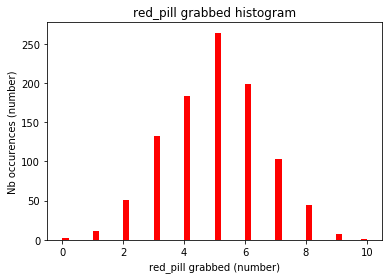

Percentage goals reached: 61.9


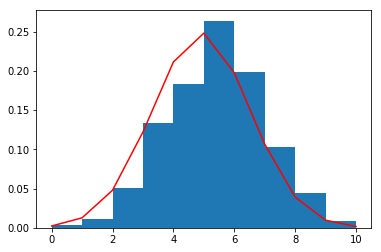

Count: [0.003 0.011 0.051 0.133 0.183 0.264 0.199 0.103 0.044 0.009]
Bins : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [40]:
def large_campaign():
    """
    Run test campaign
    """
    results, nb_success = run_test_campaign(
        NB_SIMULATIONS, NB_PILLS_IN_BOX,
        GRAB_AMOUNT, NB_RED_PILL_GOAL)

    print("="*80)
    print("Campaign results", results)
    print("GRAB_AMOUNT     :", GRAB_AMOUNT)
    print("NB_RED_PILL_GOAL:", NB_RED_PILL_GOAL)
    print("NB_PILLS_IN_BOX :", NB_PILLS_IN_BOX)
    print("NB_SIMULATIONS  :", NB_SIMULATIONS)
    print("nb_success      :", nb_success)

    print("\nNumpy")
    print("mean:", np.array(results).mean())
    print("std :", np.array(results).std())

    m = mean(results)
    s = std(results)
    print("\nHomebrew algorithm")
    print("mean:", m)
    print("std :", s)

    num_bins = NB_PILLS_IN_BOX
    plt.hist(results, num_bins, facecolor='red')
    plt.title("red_pill grabbed histogram")
    plt.xlabel("red_pill grabbed (number)")
    plt.ylabel("Nb occurences (number)")
    plt.show()

    percentage_goals_reached = (nb_success / NB_SIMULATIONS) * 100
    print("Percentage goals reached:", percentage_goals_reached)

    count, bins, _ = plt.hist(results, density=True)
    plt.plot(bins, 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-(bins - m)**2 / (2 * s**2)), color='r')
    plt.show()
    print("Count:", count)
    print("Bins :", bins)


large_campaign()


# Reflection
  * We can see that the mean and standard deviation calculated by iterating over the samples match the results given by NumPy
  * The mean is roughly at 5 which we would expect for a grab size of 10 and a box of roughly equal number of red and blue pills.
  * The percentage of grabs which contain 5 or more red pills is *61*.


## People who have helped me on this Etivity are:
- CORMAC LAVERY (plot)
- CATHAL CRONIN (plot)
- MARK MURNANE (maths)
    